This is a YOLO V3 model trained based on [Darknet19 448x448 pre-trained model](https://pjreddie.com/darknet/imagenet/). 

The model performs quite well. The only problem is that it's not uncommon for the model to output very different detections for very similar pictures.

What could be the cause of this problem? What are the things I can experiment with to fix it?

In [13]:
import darknetpy

from PIL import Image
import matplotlib.image as mpimg

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 7]

netMain, metaMain = darknetpy.loadNet(configPath = "../../yolo/model/yolo-obj.cfg", weightPath = "../../yolo/model/1023-pics-0.203.weights", metaPath= "../../yolo/model/obj.data")

**As you can see, these are 2 very similar pictures:**

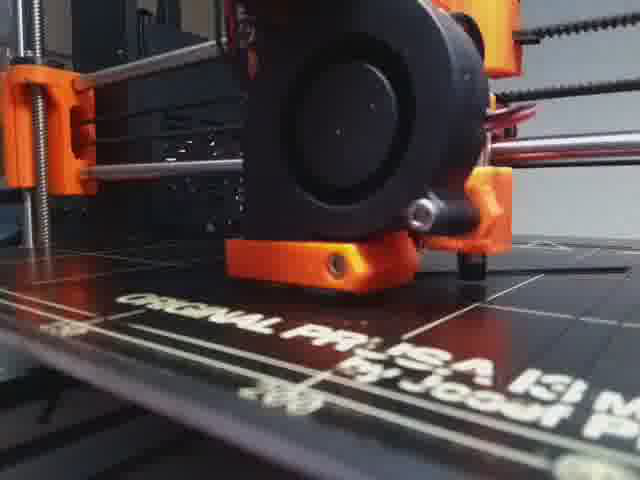

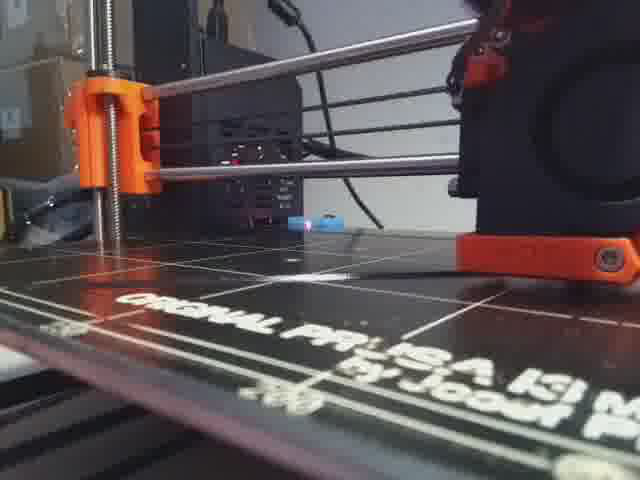

In [6]:
img1 = '/Users/kenneth/Projects/ga-ml/data/jpgs/good/611808963-00258.jpg'
img2 = '/Users/kenneth/Projects/ga-ml/data/jpgs/good/611808963-00262.jpg'
display(Image.open(img1))
display(Image.open(img2))

**But when `img1` runs through this model, the detection is at 73%, a confidence level that's pretty high in our dataset.**

In [7]:
detections = darknetpy.performDetect(netMain, metaMain, imagePath=img1)
detections

[('failure',
  0.7321227788925171,
  (414.7625732421875,
   363.60150146484375,
   187.72720336914062,
   71.10942840576172))]

*** 1 Results, color coded by confidence ***
failure: 73.0%


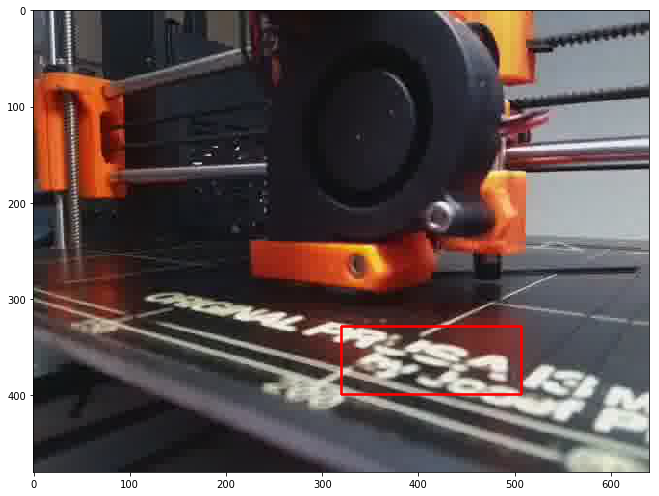

In [14]:
darknetpy.plotDetections(detections, img1, False)

**However, `img2` does not detect anything**

In [18]:
detections = darknetpy.performDetect(netMain, metaMain, imagePath=img2)
detections

[]

*** 0 Results, color coded by confidence ***


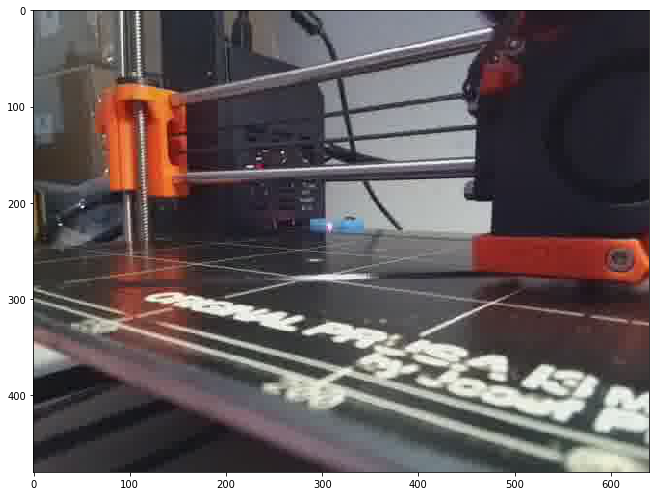

In [19]:
darknetpy.plotDetections(detections, img2, False)